## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
4. [Questions](#section4)
    - 4.1 [Number of matches held season wise](#section401)<br/>
    - 4.2 [Number of matches won by each team at each season ](#section402)<br/>
    - 4.3 [Total matches played by each team](#section403)<br/>
    - 4.4 [How many matches won by each team ?](#section404)<br/>
    - 4.5 [Comparison between Number of matches won by each team and total matches played](#section405)<br/>
    - 4.6 [Success Rate of each team?](#section406)<br/>
    - 4.7 [Each Season Winner](#section407)<br/>
    - 4.8 [Which team won maximum seasons ?](#section408)<br/>
    - 4.9 [Teams won by maximum runs](#section409)<br/>
    - 4.10 [Team won by marginal runs](#section410)<br/>
    - 4.11 [Best Defending Teams](#section411)<br/>
    - 4.12[Team won by maximum wickets](#section412)<br/>
    - 4.13 [Team won by minimum wickets](#section413)<br/>
    - 4.14 [Best Chasing Teams](#section414)<br/>
    - 4.15 [Top 10 high performing Players](#section415)<br/>
    - 4.16 [Toss winning success rate of each team](#section416)<br/>
    - 4.17 [Toss Decision across matches](#section417)<br/>
    - 4.18 [Toss Decision across seasons](#section418)<br/>
    - 4.19 [How does Toss decision varied Season wise by each team ?](#section419)<br/>
    - 4.20 [How toss winning affects the match winner](#section420)<br/>
    - 4.21 [Toss Decision  in which Toss winner is the game winner](#section421)<br/>
    - 4.22 [Top 10 Cities to hold match](#section422)<br/>
    - 4.23 [ In which city does each team has won more matches ?](#section423)<br/>
    - 4.24 [Top 10 Venues to hold match](#section424)<br/>
    - 4.25 [Identify if each Venue is Best Suited to opt for batting or fielding based on previous matches won on that venue?](#section425)<br/>
    - 4.26 [Match Results : Normal , tie and no result](#section426)<br/>
    - 4.27 [Cities with maximum DL Applied](#section427)<br/>
    - 4.28 [Hypothesis: ](#section428)<br/>
5. [Conclusions](#section5)<br/>  


### 1. Problem Statement  <a class="anchor" id="section1">

In this python notebook, analysis of IPL matches from 2008 to 2018 is done using python packages like pandas, matplotlib and seaborn. This Exploratory Data Analysis will help us to find patterns in data, determining relationships in data. We will try to identify the team that has more chance to win the upcoming seasons by finding observations like success rate of each team, identify the team that has won maximum seasons, best defending and chasing team and analyse the toss decisions etc.

<a id=section2></a>

### 2. Data Loading and Description <a class="anchor" id="section2">


<a id=section201></a>

- The dataset consists of the information about IPL matches held from 2008 to 2018. 
- The dataset comprises of __696 observations of 18 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| ID   | Match ID                                        | 
| Season      | IPL Season Year                        |  
| City        | City in which match held                                           | 
| Date          | Date on which match Held                                        |   
| Team1           | Team1                                        |
| Team2           | Team 2                                         |
| Toss_winner         | Team who won the toss |
| Toss_decision         | opted to field or bat|
| Result        |  normal or tie or Dl applied                                     |
| Winner        | Team who won the match                                            |
| Win by Runs          | Team won by how many runs                                           |
| Win by Wickets         | Team won by how many wickets                                              |
| Player Of match        | Player who won man of the match                                          |
| Venue          | Stadium where the match held                                           |
| Umpire1         | Umpire1 name                                              |
| Umpire2          | Umpire2 name                                           |
| Umpire3         | Umpire3 name                                              |

#### Some Background Information
The Indian Premier League (IPL), is a professional Twenty20 cricket league in India contested during April and May of every year
by teams representing Indian cities and some states from 2008 to 2018. The dataset that we use in this notebook is matches.csv

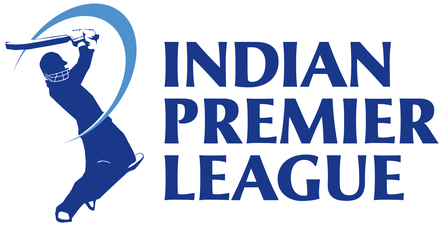

#### Importing the Packages  and Dataset

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns               # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
from subprocess import check_output

import warnings                                            # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 


def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))
import os
print(os.listdir("../input"))

data_path = "../input/"
matches_data = pd.read_csv(data_path+"matches.csv")
matches_data.head(5)

<a id=section3></a>

## 3. Data Profiling

<a id=section301></a>

### 3.1 Understanding the Dataset

Observing few rows and columns of data both from the starting and from the end


In [ ]:
matches_data.shape                                                    # This will print the number of rows and comlumns of the Data Frame

IPL matches data has __696 rows__ and __18 columns.__

In [ ]:
matches_data.columns                                            # This will print the names of all columns.

In [ ]:
matches_data.info()                                                   # This will give Index, Datatype and Memory information

In [ ]:
matches_data.describe()

In [ ]:
matches_data.isnull().sum()

From the above output we can see that __city__ and __umpire3__ columns contains __maximum null values__. We will see how to deal with them.

<a id=section302></a>

### 3.3 Preprocessing

- Dealing with missing values<br/>
    - Replacing missing entries of __City__ from the Venue Column.
    - Replacing __Rising Pune supergiant as Rising Pune supergiants __.
    - Dropping the column __'Umpire3'__ as it has too many _null_ values.
    - Replace city __Bengaluru to Bangalore__

Drop umpire3 column as it has 91% missing values

In [ ]:
matches_data.drop('umpire3', axis=1, inplace=True)  
matches_data.columns.unique()

Rising Pune Supergiants is having 2 teams with different names (Rising Pune Supergiants and Rising Pune Supergiant)  replacing all values with same name Rising Pune Supergiants

In [ ]:
#Replacing Rising Pune Supergiant with Rising Pune Supergiants
matches_data.replace( 'Rising Pune Supergiant', 'Rising Pune Supergiants',inplace = True)
matches_data.head(2)

### Replacing Null values in CITY column from VENUE

In [ ]:
matches_data['city'].fillna( matches_data['venue'].apply(lambda x: x[:5]),inplace = True)
matches_data[matches_data['city']== 'Dubai']

### Missing values of winner and player_of_match columns.

In [ ]:
matches_data[matches_data['winner'].isnull()]

As the matches had no result these columns would be left blank and no need to replace with any values.

### Replace city Bengaluru to Bangalore

In [ ]:
matches_data.replace( 'Bengaluru', 'Bangalore',inplace = True)
matches_data['city'].unique()

In [ ]:

matches_data.columns

In [ ]:
# display the seasons
matches_data['season'].unique()  

In [ ]:
# display the team names in IPL
matches_data['team1'].unique() 

### 4. Questions <a class="anchor" id="section4">

 ### 4.1 Number of matches held season wise  <a class="anchor" id="section401">

In [ ]:
#No. of matches held each season

fig = plt.figure()
ax = fig.add_subplot(111)
ax=matches_data.groupby("season")["id"].count().plot(kind="line",title="Matches per season", marker='d',color=['blue'],figsize=(10,3)) 
plt.ylabel("No. of Matches")




Observation : More number of matches was held in __ Season 2013__ : 76 Matches

### 4.2 Number of matches won by each team at each season <a class="anchor" id="section402">

In [ ]:
max_times_winner = matches_data.groupby('season')['winner'].value_counts()

count=1
fig = plt.figure()

groups=max_times_winner.groupby('season')
for year,group in groups:
    ax = fig.add_subplot(4,3,count)
    ax.set_title(year)
    ax=group[year].plot(kind="bar",figsize=(10,15),width=0.8)
    count=count+1
    plt.xlabel('')
    plt.yticks([])
    plt.ylabel('Matches Won')
    
    totals = []
    for i in ax.patches:
        totals.append(i.get_height())
    total = sum(totals)
    for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+0.2, i.get_height()-1.5,s= i.get_height(),color="white",fontweight='bold')
    
    
plt.tight_layout()
plt.show()



Observation : __Mumbai Indians__ and __Chennai super kings__ has won maximum matches 

### 4.3 Total matches played by each team  <a class="anchor" id="section403">

In [ ]:
matches_played = matches_data['team1'].value_counts()+ matches_data['team2'].value_counts()
matches_played


### 4.4 How many matches won by each team ?  <a class="anchor" id="section404">

In [ ]:
matches_won = matches_data.groupby('winner').count()
matches_won["id"]

### 4.5 Comparison between Number of matches won by each team and total matches played <a class="anchor" id="section405">

In [ ]:
matches_won = matches_data.groupby('winner').count()
matches_won

total_matches = matches_data['team1'].value_counts()+ matches_data['team2'].value_counts()
total_matches

matches_won['Total matches']=total_matches
matches_won[["Total matches","result"]].sort_values(by=["Total matches"],ascending=False).plot.bar(stacked=True,figsize=(7,3))

Observation: __Mumbai Indians, Chennai Super Kings__ has more wins against total number of matches played by each team and __Pune Warriors__ has least wins against total matches played by them.

### 4.6 Success Rate of each team <a class="anchor" id="section406">

In [ ]:
match_succes_rate = (matches_won["id"]/total_matches)*100
#print(match_succes_rate)

data = match_succes_rate.sort_values(ascending = False)
plt.figure(figsize=(7,3))
ax = sns.barplot(x = data.index, y = data, palette="Set2");
plt.ylabel('Succes rate of each team')
plt.xticks(rotation=80)
annot_plot(ax,0.08,1)


Observation :__Chennai Super Kings__ have highest winning success rate __(61.2%)__ , followed by Mumbai Indians __(57.3%)__.

### 4.7. Each Season Winner <a class="anchor" id="section407">

In [ ]:
season_winner = matches_data.groupby('season')['season','winner'].tail(1)
season_winner.sort_values(by="season",ascending=True)

The above table displays each season wise winner from 2008 to 2018

### 4.8 Which team won maximum seasons ?  <a class="anchor" id="section408">

In [ ]:
season_winner.groupby('winner').count().plot.bar(figsize=(5,3))

Observation: __Chennai Super Kings and Mumbai Indians__ won 3 seasons each

### 4.9 Teams won by maximum runs   <a class="anchor" id="section409">

In [ ]:
maximum_runs = matches_data.sort_values('win_by_runs', ascending = False)[:5].head(5)
maximum_runs[['season','winner','win_by_runs']]

Observation: __Royal Challengers Bangalore__ has won by maximum runs most of the time, they are good defenders and __Mumbai Indians__ has won with highest run difference of __146__.

### 4.10 Team won by marginal runs <a class="anchor" id="section410">

In [ ]:
min_runs = matches_data[matches_data['win_by_runs'] == 1]
min_runs['winner'].value_counts()

 __Mumbai Indians__ and __Kings XI Punjab__ defended the opposite team with marginal runs.

### 4.11 Best Defending Teams <a class="anchor" id="section411">

In [ ]:
plt.figure(figsize=(8,5))

sns.swarmplot(y='win_by_runs',x='winner',data=matches_data)
plt.tight_layout()
plt.xticks(rotation=90)
plt.title('Best Defending Teams')
plt.show()

__Mumbai Indians, Royal Challangers Bangalore, Chennai Super kings and Sunrisers Hyderabad__ are best Defending teams.

### 4.12 Team won by maximum wickets <a class="anchor" id="section412">

In [ ]:
max_wickets=matches_data[matches_data['win_by_wickets']==10]
max_wickets['winner'].value_counts()

Observation : __Royal Challengers Bangalore__ is a best chasing team, had won the match many times with maximum wickets.

### 4.13 Team won by minimum wickets <a class="anchor" id="section413">

In [ ]:
matches_data[['season','winner','win_by_wickets']][matches_data['win_by_wickets'] ==1]

__Kolkata Knight Riders, Chennai Super Kings, Sunrisers Hyderabad__ had won the match with marginal wickets.

### 4.14 Best Chasing Team <a class="anchor" id="section414">

In [ ]:
plt.figure(figsize=(8,5))
sns.swarmplot(y='win_by_wickets',x='winner',data=matches_data)
plt.xticks(rotation=80)
plt.title('Best Chasing Team')
plt.show()

__Royal Challangers Bangalore, Mumbai Indians__ and __Kolkata Knight Riders__ are the best Chasing teams.

<a id=section411></a>

### 4.15 Top 10 high performing Players <a class="anchor" id="section415">

In [ ]:
plt.figure(figsize=(5,3))

ax =matches_data['player_of_match'].value_counts()[:10].plot.bar()
plt.title('Top 10 high performing Players')
annot_plot(ax,0.08,1)

__CH Gayle__ has won Player of the match  __20__ times followed by __AB de Villers__ who had won __18__ times.

### 4.16  Toss winning success rate of each team <a class="anchor" id="section416">

In [ ]:
toss_won = matches_data['toss_winner'].value_counts()
toss_win_rate = (toss_won/matches_played)*100
data = toss_win_rate.sort_values(ascending = False)
plt.figure(figsize=(5,3))
ax = sns.barplot(x = data.index, y = data, palette="Set2");
plt.ylabel('Toss win rate of each team')
plt.xticks(rotation=90)
annot_plot(ax,0.08,1)
plt.title('Toss winning success rate of each team')

__Deccan Chargers__ has the highest Toss winning success rate of __57.3%__ and __Rising Pune Supergaints__ has the least toss winning success rate of __43.3%__.

### 4.17 Toss Decision across matches <a class="anchor" id="section417">

In [ ]:
toss=matches_data['toss_decision'].value_counts()
labels=np.array(toss.index)
sizes = toss.values
colors = ['gold', 'lightskyblue']

# Plot
plt.figure(figsize=(5,3))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Toss Decision of all the matches')
plt.axis('equal')
plt.show()

__59.3%__ of the toss winning teams have opted for __Feilding__ while __40.7%__ have opted for __Batting__.

### 4.18 Toss Decision across seasons <a class="anchor" id="section418">

In [ ]:
plt.figure(figsize=(8,3))
ax =sns.countplot(x='season',hue='toss_decision',data=matches_data,palette="Set2")
plt.ylabel('Toss Decision frequency')
plt.title('Toss Decision across seasons')
annot_plot(ax,0.08,1)

From the year __2014__ most of the teams are opting to __field__ after winning toss.

### 4.19 How does Toss decision varied Season wise by each team ? <a class="anchor" id="section419">

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(x="toss_winner", y="season", hue = 'toss_decision', data=matches_data)
plt.xlabel('toss_winner ')
plt.xticks(rotation=90)
plt.title('Toss decision by each team')

Almost all the teams are preferring to OPT for __feilding__ from __2014__ onwards.

### 4.20 How toss winning affects the match winner <a class="anchor" id="section420">

In [ ]:
tosswin_win = matches_data['id'][matches_data['toss_winner'] == matches_data['winner']].count()
total_matches=matches_data['id'].count()
Success_rate = ((matches_data[matches_data['toss_winner'] == matches_data['winner']].count())/(total_matches))*100

print("Number of matches in which Toss winner is the game winner is :",tosswin_win, "out of",total_matches," ie.,", Success_rate["id"],"%" )


###  4.21 Toss Decision  in which Toss winner is the game winner<a class="anchor" id="section421">

In [ ]:
tosswin_winner = matches_data['toss_decision'][matches_data['toss_winner'] == matches_data['winner']].value_counts()
labels=np.array(tosswin_winner.index)
sizes = tosswin_winner.values
colors = ['gold', 'lightskyblue']

plt.figure(figsize=(5,3))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Toss decision of toss winner to win the game')
plt.axis('equal')
plt.show()

__63.9%__ of the toss winning teams had decided to __field__ first while __36.1%__ had decided to __Bat__ first and won the matches.

### 4.22 Top 10 Cities to hold match <a class="anchor" id="section422">

In [ ]:
plt.figure(figsize=(5,3))

ax=matches_data['city'].value_counts()[:10].plot.bar()
plt.title('Top 10 Cities to hold match')
plt.xticks(rotation=70)
annot_plot(ax,0.08,1)

__Mumbai__ had hold highest number of matches (__94__) followed by __Kolkata (70)__.

### 4. 23 In which city does each team has won more matches ?<a class="anchor" id="section423">

In [ ]:
a=matches_data.groupby(['winner','city']).size().reset_index(name='win_counts')
a=a.sort_values("win_counts",ascending=False)
a.groupby("winner").head(1)

Teams had won more matches in their home grounds.

### 4.24 Top 10 venue to hold matches <a class="anchor" id="section424">

In [ ]:
#top 10 venue to hold max number of matches
plt.figure(figsize=(5,3))
venue=matches_data.groupby('venue')["id"].count()
ax =venue.sort_values(ascending=False).head(10).plot.bar(figsize=(5,3))
plt.title('Top 10 venue to hold matches')
plt.xticks(rotation=90)
annot_plot(ax,0.08,1)

__M Chinnaswamy Stadium__ had hold highest number of matches (__73__) followed by __Eden Gardens (70)__.

### 4.25 Identify if each Venue is Best Suited to opt for batting or fielding based on previous matches won on that venue <a class="anchor" id="section425">

In [ ]:
venue_suit_for =matches_data[matches_data['toss_winner'] == matches_data['winner']]
sns.countplot(x='venue',hue='toss_decision',data=venue_suit_for)
plt.xlabel('Venue ')
plt.title('Venue is Best Suited for')
plt.xticks(rotation=90)

__M Chinnaswamy stadium and Eden Gardens__ is best Suited for Feilding and __MA Chidambaram Stadium ,Chepauk__ is best suited for Batting.

### 4.26 Match Results : Normal , tie and no result <a class="anchor" id="section426">

In [ ]:

result=matches_data['result'].value_counts().tolist()
names='Normal - '+str(result[0]), 'Tie - '+str(result[1]), 'No result - '+str(result[2]), 

fig, ax = plt.subplots(figsize=(3.5,3.5))  
# Create a pieplot
explode = (0, 0.01, 0.01)
ax1,text=ax.pie(result,labeldistance=2,explode=explode,radius=0.1, startangle=180,colors=['skyblue','green','red'])
#plt.show()
ax.axis('equal')
ax.set_title("Match Results") 

# add a circle at the center
my_circle=plt.Circle( (0,0), 0.07, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(ax1, names,  bbox_to_anchor=(.9,.8), loc=2)
plt.tight_layout()
plt.show()

### 4.27 Cities with maximum DL Applied <a class="anchor" id="section427">

In [ ]:
toss=matches_data['dl_applied'].value_counts()
labels=np.array(toss.index)
sizes = toss.values
colors = ['gold', 'lightskyblue']

# Plot
plt.figure(figsize=(5,3))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Dl applied of all the matches')
plt.axis('equal')
plt.show()

In [ ]:
plt.figure(figsize=(5,3))
ax=sns.countplot(matches_data.city[matches_data.dl_applied==1])
plt.ylabel('Dl applied count City wise')
plt.xticks(rotation=80)


__Kolkata, Bangalore and Delhi__ is more likely to have bad weather.

### 4.28 Hypothesis: Mumbai Indians and Chennai Super Kings likely to win more matches
<a class="anchor" id="section428">

On studying Questionnaire 4.2, 4.6 and 4.8 we observed that Mumbai Indians and Chenni Super Kings are the teams who are more likely to win th IPL Season.

<a id=section5></a>

### 5. Conclusion 


- This dataset contains data about IPL matches  from season 2008 to 2018
- Totally 13 teams has participated in IPL History and few teams like Pune Warriors,Kochi Tuskers Kerala,Rising Pune Supergiants, Gujarat Lions has been only in 2 seasons but the success rate of __Rising Pune Supergiants__ is good comparatively among the new teams (__From: Section 4.6__)
- __Mumbai Indians, Royal Challangers Bangalore and Chennai Super kings__ are best Defending teams (__From: Section 4.11__) 
- __Royal Challangers Bangalore, Mumbai Indians__ and __Kolkata Knight Riders__ are the best Chasing teams (__From: Section 4.14__)
- From the year 2014 most of the teams are opting to field after winning toss and are also successful in winning the match. (__From: Section 4.18 and 4.19__)
- Overall  __Chennai Super Kings__ and __Mumbai Indians__ have high success rate and these two teams are the most successful teams in the tournament with 3 season wins each (__From: Section 4.2 ,4.6 and 4.8__)
- From the analysis, it was concluded that __Chennai Super Kings__ and __Mumbai Indians__  are more likely to win upcoming IPL seasons (__Collectively From: 4.5, 4.6, 4.8 and 4.11__)